## MILESTONE
### Nama : Azka Irsyad CHoir
### Batch : HCK-024

- URL Dataset : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers
- URL Tableu : https://public.tableau.com/app/profile/azka.irsyad/viz/TABLEU_AZKA_BANK/Dashboard1?publish=yes


# 2. Identifikasi Masalah

## Latar Belakang : 
bagaimana kita bisa menghadapi masalah churn pelanggan pada layanan kartu kredit, di mana sekitar 17% pelanggan berhenti menggunakan kartu kredit mereka. Churn ini dapat menyebabkan penurunan pendapatan bank dan meningkatkan biaya untuk memperoleh pelanggan baru.


#### SMART
- spesifik : Bank ingin menurunkan tingkat churn pelanggan yang saat ini mencapai 16%, dengan memprediksi pelanggan yang berisiko churn dan mengambil langkah-langkah untuk mempertahankan mereka
- Measureable : 
bank mengharapkan penurunan 5-10% dalam churn pelanggan setelah tindakan preventif diimplementasikan berdasarkan hasil model.
- Achievable :  
memberikan kenaikan limit otomatis kepada nasabah yang aktif bertranksaksi lebih dari 50 tranksaksi dalam waktu 12 bulan terakhir
- Relevant : 
Jika angka churn rendah , maka bank akan menghasilakan profit yang lebih besar
- Time Bound : 
tercapai dalam waktu 3 bulan untuk menghasilkan model prediksi churn yang dapat diterapkan segera untuk membantu bank mengambil langkah-langkah preventif guna menurunkan tingkat churn pelanggan.

- Problem Statement : 
untuk menurunkan tingkat churn sebesar 5-10% melalui implementasi strategi berbasis hasil prediksi model. Salah satu strategi yang dapat diterapkan adalah memberikan kenaikan limit otomatis kepada pelanggan yang aktif bertransaksi lebih dari 50 transaksi dalam 12 bulan terakhir.


## Penjabaran masalah dengan metode 5W+1H:

- Apa yang menyebabkan tingkat churn pelanggan mencapai 16%?
- Mengapa menurunkan churn pelanggan menjadi penting bagi bank?
- Siapa saja pelanggan yang paling berisiko untuk churn?
- Apakah jumlah income category mempengaruhi churn ?
- Kapan pelanggan cenderung berhenti menggunakan kartu kredit?
- Bagaimana cara bank mengidentifikasi pelanggan yang berisiko tinggi churn?


# 3. Data Loading

## Data Explorasi

- CLIENTNUM: ID unik pelanggan.
- Attrition_Flag: Status pelanggan, apakah masih aktif (Existing Customer) atau sudah churn (Attrited Customer).
- Customer_Age: Usia pelanggan.
- Gender: Jenis kelamin pelanggan (M/F).
- Dependent_count: Jumlah tanggungan keluarga.
- Education_Level: Tingkat pendidikan pelanggan (contoh: High School, Graduate).
- Marital_Status: Status pernikahan pelanggan (contoh: Married, Single, Unknown).
- Income_Category: Kategori pendapatan pelanggan (contoh: Less than $40K, $60K - $80K).
- Card_Category: Jenis kartu kredit (contoh: Blue, Gold).
- Months_on_book: Lama waktu pelanggan menjadi nasabah (dalam bulan).
- Total_Relationship_Count: Jumlah total produk atau layanan yang digunakan pelanggan.
- Months_Inactive_12_mon: Jumlah bulan tidak aktif dalam 12 bulan terakhir.
- Contacts_Count_12_mon: Jumlah kontak pelanggan dengan bank dalam 12 bulan terakhir.
- Credit_Limit: Batas kredit pelanggan.
- Total_Revolving_Bal: Saldo bergulir total pada kartu kredit.
- Avg_Open_To_Buy: Rata-rata jumlah kredit yang tersedia untuk digunakan.
- Total_Amt_Chng_Q4_Q1: Perubahan jumlah transaksi kuartal 4 dibanding kuartal 1.
- Total_Trans_Amt: Jumlah total transaksi dalam 12 bulan terakhir.
- Total_Trans_Ct: Jumlah total transaksi yang dilakukan.
- Total_Ct_Chng_Q4_Q1: Perubahan jumlah transaksi kuartal 4 dibanding kuartal 1.
- Avg_Utilization_Ratio: Rasio pemakaian rata-rata terhadap batas kredit.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('BankChurners.csv')

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


melihat colum categorical

In [3]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

melihat colum numerik

In [4]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns, 


(['CLIENTNUM',
  'Customer_Age',
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio',
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],)

In [5]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

### Deskripsi Dataset 
Dataset ini menyediakan tentang, keterlibatan, perilaku transaksi, dan keuangan nasabah. Informasi ini sangat berguna untuk menganalisis faktor-faktor yang berhubungan dengan churn (nasabah berhenti aktif) dan membantu bank mengambil langkah-langkah untuk mempertahankan nasabah.

# 4. Data Cleaning

kebetulan saya dapat data yang sudah bersih , tidak ada missing value

In [6]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Analisis dan Perhitungan

##### 1.  Apa yang menyebabkan tingkat churn pelanggan mencapai 16%?

In [8]:
# Menghitung persentase churn pelanggan
churn_rate = (df[df['Attrition_Flag'] == 'Attrited Customer'].shape[0] / df.shape[0]) * 100
print(f"Tingkat churn pelanggan: {churn_rate:.2f}%")

Tingkat churn pelanggan: 16.07%


In [ ]:
print(f"Skewness: {df['Total_Trans_Ct'].skew()}")

Skewness: 0.15367306849872275


disini nilai skew 0.033 yang berarti normal 

In [ ]:
print(f"Kurtosis: {df['Total_Trans_Ct'].kurtosis()}")

Kurtosis: -0.36716324112759624


In [ ]:
print('Average:',df['Total_Trans_Ct'].mean())
print('Median:',df['Total_Trans_Ct'].median())

Average: 64.85869457884863
Median: 67.0


In [ ]:
avg = df['Total_Trans_Ct'].mean()
std = df['Total_Trans_Ct'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper : {up_bound:.2f}' )
print(f'Lower : {low_bound:.2f}')

Upper : 135.28
Lower : -5.56


In [ ]:
# Menghitung statistik deskriptif untuk variabel yang relevan
churned = df[df['Attrition_Flag'] == 'Attrited Customer']
non_churned = df[df['Attrition_Flag'] == 'Existing Customer']

# Statistik deskriptif untuk variabel numerik (Total_Trans_Ct, Customer_Age, Credit_Limit)
print("\nStatistik Deskriptif Pelanggan Churn:")
print(churned[['Total_Trans_Ct']].mean())


Statistik Deskriptif Pelanggan Churn:
Total_Trans_Ct    44.93362
dtype: float64


Tingkat churn pelanggan yang mencapai 16.07%  melalui rata-rata yang terlihat dalam statistik deskriptif, disebabkan oleh dua faktor utama. Pelanggan yang churn memiliki rata-rata transaksi yang lebih rendah (44.93), menunjukkan mereka kurang aktif menggunakan kartu kredit.membuat mereka merasa terbatas dalam menggunakan kartu kreditnya dan akhirnya memutuskan untuk berhenti menggunakan kartu kredit.

#### 2. Mengapa menurunkan churn pelanggan menjadi penting bagi bank? 

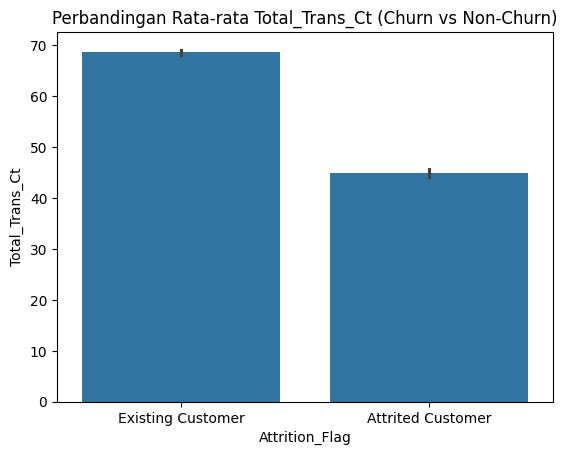

In [ ]:
# Membuat bar plot untuk perbandingan rata-rata Total_Trans_Ct dan Credit_Limit antara Churn dan Non-Churn
sns.barplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Perbandingan Rata-rata Total_Trans_Ct (Churn vs Non-Churn)')
plt.show()


- pada visualisasi yang pertama = pelanggan yang churn rata-rata Total_Trans_Ct (total tranksaksinya) lebih rendah dibandingkan dengan yang non churn , mengindikasikan pelanggan churn cenderung melakukan tranksaksi lebih sdikit yang menunjukan ketidakpuasan dengan produk atau layanan bank

dari visual ini kita dapat menjawab :
Menurunkan tingkat churn pelanggan menjadi sangat penting bagi bank karena dapat meningkatkan aktivitas transaksi yang menghasilkan pendapatan. Dengan mengurangi churn, bank bisa mempertahankan pelanggan yang sudah ada, yang biasanya lebih menguntungkan daripada menarik pelanggan baru

#### 3. Siapa saja pelanggan yang paling berisiko untuk churn? 

Berdasarkan Usia Pelanggan 

In [ ]:
# Filter pelanggan churn
churned = df[df['Attrition_Flag'] == 'Attrited Customer']
# Fokus pada beberapa variabel yang relevan
risk_factors = churned[['Customer_Age', 'Credit_Limit', 'Total_Trans_Ct', 'Months_on_book']]
# Menentukan pelanggan dengan transaksi rendah dan limit kredit rendah
high_risk = risk_factors[(risk_factors['Total_Trans_Ct'] < 20) & (risk_factors['Credit_Limit'] < 5000)]
# Menampilkan pelanggan berisiko tinggi
print(high_risk.head(10))

     Customer_Age  Credit_Limit  Total_Trans_Ct  Months_on_book
21             62        1438.3              16              49
51             54        1438.3              19              40
82             55        2158.0              12              45
145            48        2732.0              16              38
230            60        1438.3              12              50
236            52        1857.0              17              36
247            46        2442.0              19              30
253            59        3616.0              17              48
268            64        3353.0              18              53
276            45        3401.0              18              36


C:\Users\JANGAN DI ENTER\AppData\Local\Temp\ipykernel_14516\3811243110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk['Age_Range'] = pd.cut(high_risk['Customer_Age'], bins=bins, labels=labels, right=False)
C:\Users\JANGAN DI ENTER\AppData\Local\Temp\ipykernel_14516\3811243110.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Range', y='Total_Trans_Ct', data=high_risk, palette='viridis')


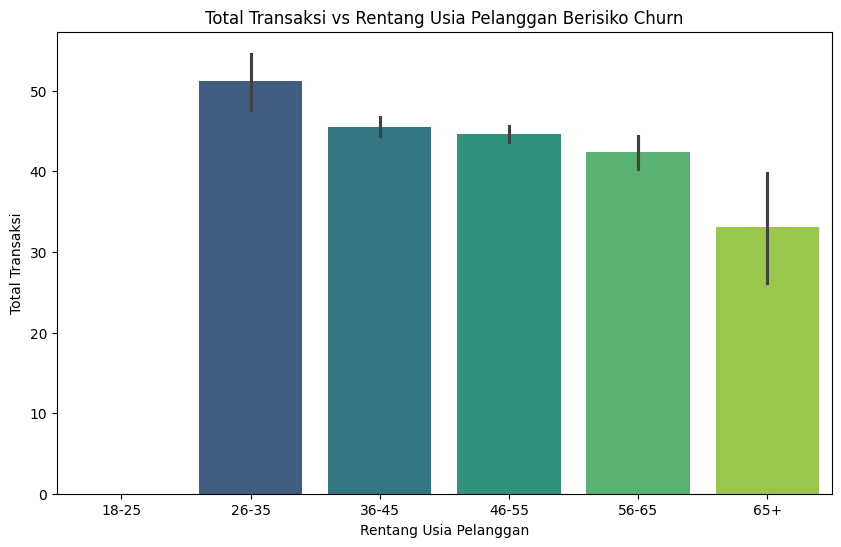

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalnya df adalah dataframe utama Anda
# Definisikan high_risk untuk pelanggan yang berisiko churn
high_risk = df[df['Attrition_Flag'] == 'Attrited Customer']

# Membuat rentang usia sebagai kategori (dimension)
bins = [18, 25, 35, 45, 55, 65, 100]  # Rentang usia
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
high_risk['Age_Range'] = pd.cut(high_risk['Customer_Age'], bins=bins, labels=labels, right=False)

# Visualisasi bar plot menggunakan Age_Range sebagai Dimension
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Range', y='Total_Trans_Ct', data=high_risk, palette='viridis')

# Menambahkan judul dan label
plt.title('Total Transaksi vs Rentang Usia Pelanggan Berisiko Churn')
plt.xlabel('Rentang Usia Pelanggan')
plt.ylabel('Total Transaksi')

# Menampilkan plot
plt.show()


terlihat bahwa rentang usia yang lebih muda, seperti 18-25 tahun, memiliki jumlah total transaksi yang lebih rendah dibandingkan dengan kelompok usia yang lebih tua. Hal ini bisa mengindikasikan bahwa pelanggan yang lebih muda cenderung melakukan transaksi lebih sedikit atau lebih jarang berinteraksi dengan produk atau layanan yang ditawarkan. Ini mungkin menunjukkan potensi rendahnya loyalitas atau keterlibatan mereka, yang menjadi faktor risiko churn.

#### 4. Apakah jumlah income category mempengaruhi churn ? 

C:\Users\JANGAN DI ENTER\AppData\Local\Temp\ipykernel_5896\2748253398.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df, color='blue')


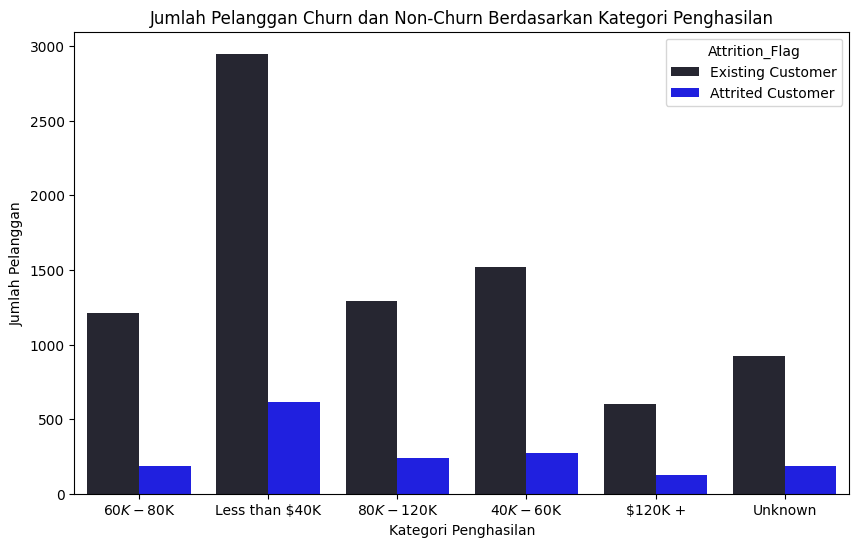

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot untuk melihat jumlah pelanggan churn dan non-churn berdasarkan kategori penghasilan
plt.figure(figsize=(10, 6))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df, color='blue')
plt.title('Jumlah Pelanggan Churn dan Non-Churn Berdasarkan Kategori Penghasilan')
plt.xlabel('Kategori Penghasilan')
plt.ylabel('Jumlah Pelanggan')
plt.show()


visualisasi yang menunjukkan jumlah pelanggan churn dan non-churn berdasarkan kategori penghasilan, terlihat bahwa kategori penghasilan memang memiliki pengaruh terhadap tingkat churn. Pelanggan dengan penghasilan lebih rendah cenderung lebih banyak yang churn dibandingkan dengan pelanggan yang memiliki penghasilan lebih tinggi. Ini menunjukkan bahwa faktor penghasilan dapat berperan dalam keputusan pelanggan untuk berhenti berlangganan layanan.

#### 5. Kapan pelanggan cenderung berhenti menggunakan kartu kredit?


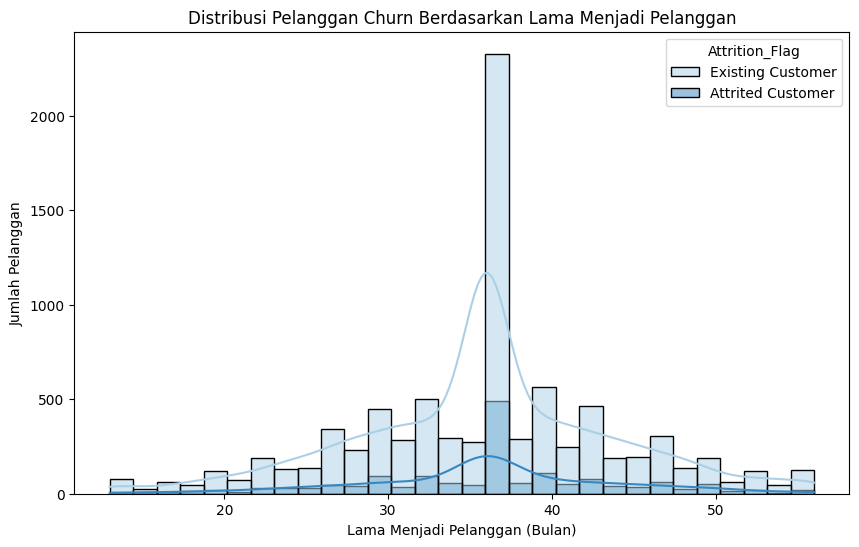

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))

# Membuat histogram dengan Seaborn
sns.histplot(data=df, x='Months_on_book', hue='Attrition_Flag', kde=True, palette="Blues", bins=30)

# Menambahkan judul dan label
plt.title('Distribusi Pelanggan Churn Berdasarkan Lama Menjadi Pelanggan')
plt.xlabel('Lama Menjadi Pelanggan (Bulan)')
plt.ylabel('Jumlah Pelanggan')

# Menampilkan plot
plt.show()



- dilihat dari data visualisasi , Pelanggan cenderung churn/berhenti menggunakan kartu kredit setelah periode berlangganan yang cukup lama (30-40bulan), dikarenakan mungkin pelanggan lama kurang puas atau sudah merasa tidak ada manfaatnya lagi, maka dari itu bank harus menjaga hubungan yang lebih baik dengan pelanggan yang sudah lama menggunakan kartu kredit agar mereka tetap loyal 

## 6. Bagaimana cara bank mengidentifikasi pelanggan yang berisiko tinggi churn > apakah dari usia pelanggan dan tranksaksi ?


- H0 = Tidak ada hubungan antara usia pelanggan dan total tranksaksi terhadap churn
- H1 = Ada hubungan antara usia pelanggan dan total tranksaksi terhadap churn


In [14]:
corr_r, pval_p = stats.pearsonr(df['Customer_Age'], df['Total_Trans_Ct'])
print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: -0.07, p-value: 1.3900282062388908e-11


Dari data di atas p-value 1.3900 maka kita dapat menolak hipotesis nol
Tidak ada hubungan antara usia pelanggan dan total tranksaksi terhadap churn

# Kesimpulan 


Tingkat churn pelanggan yang mencapai 16.07% mencerminkan adanya faktor-faktor signifikan yang mempengaruhi keputusan pelanggan untuk berhenti menggunakan kartu kredit. menunjukkan bahwa pelanggan yang churn cenderung memiliki rata-rata transaksi yang lebih rendah, yang menandakan rendahnya aktivitas penggunaan kartu kredit mereka. Hal ini bisa membuat mereka merasa kurang mendapat manfaat dari layanan tersebut, yang akhirnya menyebabkan keputusan untuk berhenti berlangganan.
pelanggan dalam rentang usia yang lebih muda (18-25 tahun) menunjukkan total transaksi yang lebih rendah, yang bisa mengindikasikan bahwa mereka kurang terlibat atau kurang loyal terhadap produk atau layanan yang ditawarkan, aktivitas rendah membuatnya berisiko churn. pelanggan yang sudah berlangganan lama (30-40 bulan) juga cenderung lebih banyak churn. Hal ini mungkin karena mereka merasa layanan tidak lagi memberikan nilai tambah, sehingga bank harus berfokus pada membangun hubungan yang lebih kuat dengan pelanggan lama agar mereka tetap merasa dihargai dan loyal.
mengurangi tingkat churn sangat penting bagi bank, karena mempertahankan pelanggan yang sudah ada jauh lebih menguntungkan dibandingkan menarik pelanggan baru. Dengan memahami faktor-faktor penyebab churn, bank dapat menyusun strategi yang lebih baik untuk meningkatkan kepuasan dan loyalitas pelanggan, serta menjaga pendapatan yang stabil.

# Rekomendasi

- Meningkatkan Aktivitas Transaksi Pelanggan:
Bank harus mengidentifikasi pelanggan dengan transaksi rendah dan memberikan insentif untuk meningkatkan aktivitas penggunaan kartu kredit.
- Segmentasi Berdasarkan Penghasilan:
Mengingat penghasilan berperan besar dalam tingkat churn, bank perlu menyesuaikan pendekatan pemasaran dan penawaran produk berdasarkan segmen penghasilan. Pelanggan dengan penghasilan lebih rendah mungkin memerlukan produk yang lebih fleksibel atau promosi khusus yang sesuai dengan kebutuhan mereka, seperti cicilan ringan atau penawaran bunga rendah. 
- Memonitor Pola Transaksi dan Aktivitas Pelanggan:
Bank harus menggunakan data transaksi untuk memantau pola aktivitas pelanggan secara lebih mendalam. Misalnya, jika seorang pelanggan mulai mengurangi frekuensi transaksi mereka, bank dapat segera menghubungi pelanggan tersebut dengan tawaran khusus atau meminta umpan balik mengenai kepuasan mereka.
- Menerapkan Program Referal untuk Pelanggan Lama:
Untuk meningkatkan loyalitas pelanggan yang sudah ada, bank bisa mengembangkan program referal, di mana pelanggan lama diberikan insentif atau hadiah jika berhasil merekomendasikan teman atau keluarga untuk menggunakan kartu kredit bank. Ini tidak hanya membantu mengurangi churn, tetapi juga dapat membawa pelanggan baru yang lebih loyal.

In [ ]:
df.to_csv('BankChurn.csv', index=False)